# Select proper medication based on patient symptoms
# Classification (Decision trees)

## Project aim:
The aim of the project is to create a model that can help medical professionals select the proper medication for patients based on their symptoms. The model uses historical data of other patients to predict what could be the most suitable medication based on the patient's symptoms. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import corrcoef
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

## Descriptive Analysis

In [2]:
# Read data from CSV file, and loaded into a pandas dataframe 
df = pd.read_csv('drug200.csv')

In [3]:
# Display 20 random samples of the dataframe
df.sample(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
4,61,F,LOW,HIGH,18.043,drugY
121,15,M,HIGH,NORMAL,17.206,drugY
73,41,F,NORMAL,NORMAL,22.905,drugY
189,64,M,HIGH,NORMAL,20.932,drugY
45,66,F,NORMAL,NORMAL,8.107,drugX
57,40,M,HIGH,HIGH,27.826,drugY
191,23,M,HIGH,HIGH,8.011,drugA
109,23,M,NORMAL,HIGH,16.850,drugY
183,36,F,HIGH,NORMAL,15.490,drugY
180,22,F,HIGH,NORMAL,22.818,drugY


In [4]:
# Display the dataset information summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# Check for missing values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
# Check the number of unique values for each variable
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

### Conclusion
Based on our descriptive analysis, we conclude the following:
- The dataset contains 200 samples.
- The dataset consists of 5 independent variables and one dependent variable.
- The dataset contains 4 numerical variables and 2 string/object variables.
- There are no missing values in the dataset.
- There are 5 possible outcomes of the dependant variable.

## Exploratory Data Analysis (EDA)
### Multivariate analysis (Correlation)

In [7]:
# Create a copy of the dataframe
numerical_df = df.copy()
# Convert the object variables into numerical values
numerical_df['Cholesterol'] = numerical_df['Cholesterol'].astype('category').cat.codes
numerical_df['Sex'] = numerical_df['Sex'].astype('category').cat.codes
numerical_df['BP'] = numerical_df['BP'].astype('category').cat.codes
numerical_df['Drug'] = numerical_df['Drug'].astype('category').cat.codes

In [8]:
# Display a summary of the new copied dataset
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int8   
 2   BP           200 non-null    int8   
 3   Cholesterol  200 non-null    int8   
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int8   
dtypes: float64(1), int64(1), int8(4)
memory usage: 4.0 KB


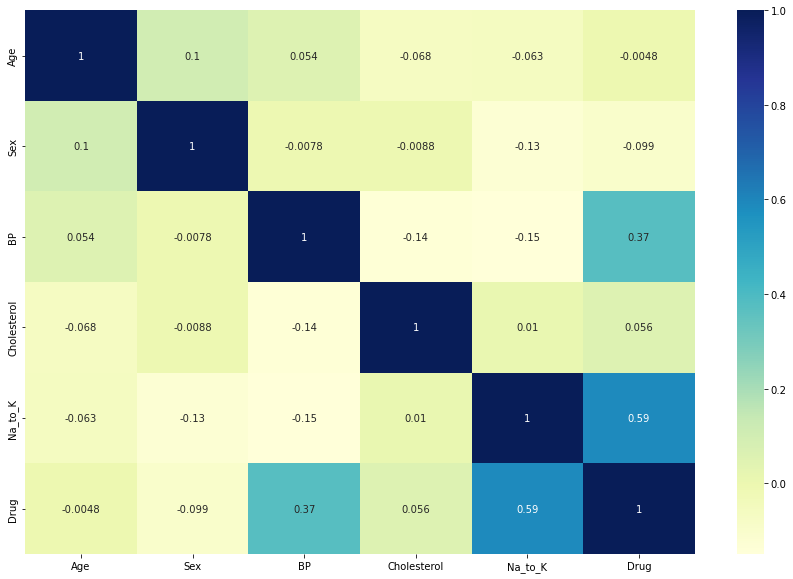

In [9]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))

# plotting correlation heatmap
dataplot = sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

In [10]:
# Separating the independent variables (symptoms) from the dependent variable (drug)
df_x = numerical_df.drop(columns=['Drug'])
df_y = numerical_df[['Drug']]

## Model training

In [11]:
# Splitting the dataset into %70 training set, and %30 testing set'
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3,random_state=10)

In [12]:
print(f'Training set:{x_train.shape},{y_train.shape}\n Testing set:{x_test.shape},{y_test.shape}')

Training set:(140, 5),(140, 1)
 Testing set:(60, 5),(60, 1)


In [46]:
# Instantiating a decision tree classifier model
clf = DecisionTreeClassifier(criterion='gini',random_state=0, splitter='best')

# Training the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

### Model validation

In [47]:
# Using the model to predict the proper medication using the testing set
y_predict = clf.predict(x_test)

In [48]:
# Measuring the goodness of the model fit using the coefficient of determination
r2_score(y_predict,y_test)

0.9838947792242652

In [50]:
# The model accuracy score
clf.score(x_test,y_test)

0.9666666666666667

# Conclusion
Using the decision trees machine learning algorithm, we were able to build a model that can predict the proper medication for patients using historical data of other patiotns with an accuracy of %96.